In [6]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf

In [7]:
# Load text
with open('Downloads/LP-IV-datasets-20251107T052642Z-1-001/LP-IV-datasets/CBOW(Ass5)/CBOW.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split into sentences
sentences = text.split('.')   # or text.split('.') if you prefer

# Clean each sentence
clean_sen = []
for sen in sentences:
    if sen.strip() == "":
        continue
    sen = re.sub('[^A-Za-z0-9]+', ' ', sen)   # remove special chars
    sen = sen.lower().strip()                  # lowercase + trim
    clean_sen.append(sen)

print(clean_sen)


['the speed of transmission is an important point of difference between the two viruses', 'influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid 19 virus', 'the serial interval for covid 19 virus is estimated to be 5 6 days while for influenza virus the serial interval is 3 days', 'this means that influenza can spread faster than covid 19', 'further transmission in the first 3 5 days of illness or potentially pre symptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza', 'in contrast while we are learning that there are people who can shed covid 19 virus 24 48 hours prior to symptom onset at present this does not appear to be a major driver of transmission', 'the reproductive number the number of secondary infections generated from one infected individual is understood to be between 2 and 2', 

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sen)
seq = tokenizer.texts_to_sequences(clean_sen)
seq

[[1, 37, 2, 3, 9, 38, 39, 40, 2, 41, 13, 1, 42, 22],
 [4,
  43,
  11,
  23,
  44,
  45,
  46,
  1,
  14,
  24,
  47,
  10,
  25,
  2,
  26,
  12,
  11,
  23,
  15,
  16,
  1,
  14,
  13,
  48,
  49,
  17,
  5,
  6,
  7],
 [1,
  15,
  16,
  8,
  5,
  6,
  7,
  9,
  50,
  10,
  18,
  19,
  51,
  20,
  27,
  8,
  4,
  7,
  1,
  15,
  16,
  9,
  28,
  20],
 [29, 52, 30, 4, 31, 53, 54, 17, 5, 6],
 [55,
  3,
  32,
  1,
  56,
  28,
  19,
  20,
  2,
  57,
  58,
  59,
  60,
  61,
  3,
  3,
  2,
  1,
  7,
  62,
  1,
  25,
  2,
  26,
  9,
  11,
  33,
  34,
  2,
  3,
  8,
  4],
 [32,
  63,
  27,
  64,
  21,
  65,
  30,
  66,
  21,
  67,
  68,
  31,
  69,
  5,
  6,
  7,
  70,
  71,
  72,
  73,
  10,
  74,
  75,
  76,
  77,
  29,
  78,
  79,
  80,
  10,
  18,
  11,
  33,
  34,
  2,
  3],
 [1,
  81,
  35,
  1,
  35,
  2,
  82,
  83,
  84,
  24,
  85,
  86,
  87,
  9,
  88,
  10,
  18,
  13,
  36,
  12,
  36],
 [19, 8, 5, 6, 7, 89, 17, 8, 4],
 [90, 91, 8, 92, 5, 6, 12, 4, 22, 21, 93, 94, 12, 14, 95, 9

In [10]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in seq:
    for i in range(context_size,len(sequence)-context_size):
        target = sequence[i]
        context = [sequence[i-2],sequence[i-1],sequence[i+1],sequence[i+2]]
        targets.append(target)
        contexts.append(context)

print(contexts)
print(targets)

[[1, 37, 3, 9], [37, 2, 9, 38], [2, 3, 38, 39], [3, 9, 39, 40], [9, 38, 40, 2], [38, 39, 2, 41], [39, 40, 41, 13], [40, 2, 13, 1], [2, 41, 1, 42], [41, 13, 42, 22], [4, 43, 23, 44], [43, 11, 44, 45], [11, 23, 45, 46], [23, 44, 46, 1], [44, 45, 1, 14], [45, 46, 14, 24], [46, 1, 24, 47], [1, 14, 47, 10], [14, 24, 10, 25], [24, 47, 25, 2], [47, 10, 2, 26], [10, 25, 26, 12], [25, 2, 12, 11], [2, 26, 11, 23], [26, 12, 23, 15], [12, 11, 15, 16], [11, 23, 16, 1], [23, 15, 1, 14], [15, 16, 14, 13], [16, 1, 13, 48], [1, 14, 48, 49], [14, 13, 49, 17], [13, 48, 17, 5], [48, 49, 5, 6], [49, 17, 6, 7], [1, 15, 8, 5], [15, 16, 5, 6], [16, 8, 6, 7], [8, 5, 7, 9], [5, 6, 9, 50], [6, 7, 50, 10], [7, 9, 10, 18], [9, 50, 18, 19], [50, 10, 19, 51], [10, 18, 51, 20], [18, 19, 20, 27], [19, 51, 27, 8], [51, 20, 8, 4], [20, 27, 4, 7], [27, 8, 7, 1], [8, 4, 1, 15], [4, 7, 15, 16], [7, 1, 16, 9], [1, 15, 9, 28], [15, 16, 28, 20], [29, 52, 4, 31], [52, 30, 31, 53], [30, 4, 53, 54], [4, 31, 54, 17], [31, 53, 17,

In [11]:
X = np.array(contexts)
Y = np.array(targets)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Embedding , Lambda

In [13]:
model = Sequential([
    Embedding(input_dim=vocab_size,output_dim=emb_size,input_length=2*context_size),
    Lambda(lambda x:tf.reduce_mean(x,axis=1)),
    Dense(256,activation='relu'),
    Dense(512,activation='relu'),
    Dense(vocab_size,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X,Y,epochs=80)

C:\Users\Devansh\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/80

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0189 - loss: 4.6147   
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0503 - loss: 4.6032    
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0503 - loss: 4.5867 
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0503 - loss: 4.5566 
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0503 - loss: 4.5075
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0503 - loss: 4.4220    
Epoch 7/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0503 - loss: 4.3217     
Epoch 8/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0503 - loss: 4.2371
Epoch 9/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0566 - loss: 4.2100 
Epoch 10/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0818 - loss: 4.1623 
Epoch 11/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0692 - loss: 4.1055 
Epoch 12/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0818 -

<Axes: >

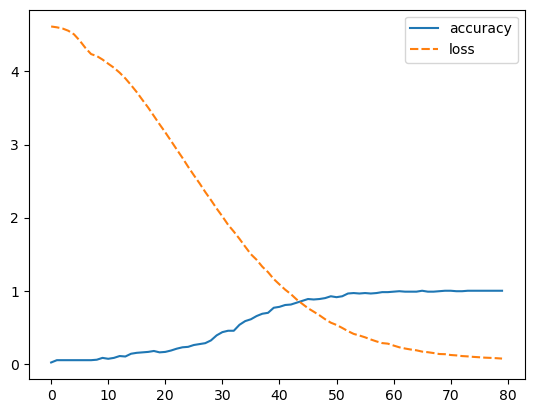

In [14]:
import seaborn as sns
sns.lineplot(model.history.history)

In [16]:
test_sentenses = [
    "an important point difference"
]
index_to_word = {index: word for word, index in tokenizer.word_index.items()}
word_to_index = tokenizer.word_index


pred = model.predict(x_test)
pred_word = index_to_word[np.argmax(pred[0])]

print("\nContext:", test_context)
print("Predicted target word = ", pred_word)

SyntaxError: invalid non-printable character U+00A0 (2107487543.py, line 19)